여러개의 입력을 하나로 합치는 layer 에 대해서 알아봅시다.

In [1]:
from tensorflow.keras import layers, models
import numpy as np

x_test_A = np.array([[0,1],[4,5]])
x_test_B = np.array([[2,3],[6,7]])

xA = layers.Input(shape=(2,), name='xA')
xB = layers.Input(shape=(2,), name='xB')

입력을 그대로 이어서 붙이는 Concatenate 을 사용해 봅시다. 소문자로 시작하는 concatenate 은 괄호 안에 바로 입력 텐서를 넣어주면 됩니다.

In [2]:
y = layers.Concatenate(name='concat')([xA, xB])
#y = layers.concatenate([xA, xB], name='cancat')
model = models.Model(inputs=[xA, xB], outputs=y)
model.summary()

y_pred = model.predict([x_test_A, x_test_B])

print()
print('x_test_A'); print(x_test_A)
print()
print('x_test_B'); print(x_test_B)
print()
print('y_pred'); print(y_pred)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 2)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 2)]          0                                            
__________________________________________________________________________________________________
concat (Concatenate)            (None, 4)            0           xA[0][0]                         
                                                                 xB[0][0]                         
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________

x_test_A
[[0 1]
 [4 5]]

x_test_B

입력을 더해서 하나로 만드는 Add

In [3]:
y = layers.Add(name='add')([xA, xB])
#y = layers.add([xA, xB], name='add')
model = models.Model(inputs=[xA, xB], outputs=y)
model.summary()

y_pred = model.predict([x_test_A, x_test_B])

print()
print('x_test_A'); print(x_test_A)
print()
print('x_test_B'); print(x_test_B)
print()
print('y_pred'); print(y_pred)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 2)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 2)]          0                                            
__________________________________________________________________________________________________
add (Add)                       (None, 2)            0           xA[0][0]                         
                                                                 xB[0][0]                         
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________

x_test_A
[[0 1]
 [4 5]]

x_test

두 입력을 곱해서 하나로 만드는 Multiply

In [4]:
y = layers.Multiply(name='mul')([xA, xB])
#y = layers.multiply([xA, xB], name='mul')
model = models.Model(inputs=[xA, xB], outputs=y)
model.summary()
y_pred = model.predict([x_test_A, x_test_B])

print()
print('x_test_A'); print(x_test_A)
print()
print('x_test_B'); print(x_test_B)
print()
print('y_pred'); print(y_pred)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 2)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 2)]          0                                            
__________________________________________________________________________________________________
mul (Multiply)                  (None, 2)            0           xA[0][0]                         
                                                                 xB[0][0]                         
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________

x_test_A
[[0 1]
 [4 5]]

x_test

Lambda layer 와 Concatenate layer 를 사용하여 y = c0 + c1 * x + c2 * x^2 + c3 * x^3 관계를 가진 데이터에서 학습을 통하여 c0, c1, c2, c3 를 찾아내기

In [5]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

c0 = 1; c1 = 1; c2 = 2; c3 = 3

x_train = np.random.rand(1000,1) * 10 - 5
y_train = c0 + c1 * x_train +  c2 * x_train**2 + c3 * x_train**3

x = layers.Input(shape=(1,), name='x')

h1_A, h1_B, h1_C = layers.Lambda(lambda x: [x, x**2, x**3], name='h1_ABC')(x)
h2 = layers.Concatenate(name='concat')([h1_A, h1_B, h1_C])
y = layers.Dense(1, name='y')(h2)

In [6]:
model = models.Model(x, y)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
h1_ABC (Lambda)                 [(None, 1), (None, 1 0           x[0][0]                          
__________________________________________________________________________________________________
concat (Concatenate)            (None, 3)            0           h1_ABC[0][0]                     
                                                                 h1_ABC[0][1]                     
                                                                 h1_ABC[0][2]                     
____________________________________________________________________________________________

In [7]:
model.compile('adam', 'mse')
hist = model.fit(x_train, y_train, batch_size=8, epochs=200, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 254us/sample - loss: 15690.2553 - val_loss: 14732.2311
Epoch 2/200
800/800 [==============================] - 0s 89us/sample - loss: 14624.1520 - val_loss: 13699.3232
Epoch 3/200
800/800 [==============================] - 0s 89us/sample - loss: 13599.9983 - val_loss: 12757.2307
Epoch 4/200
800/800 [==============================] - 0s 88us/sample - loss: 12638.8535 - val_loss: 11832.4180
Epoch 5/200
800/800 [==============================] - 0s 86us/sample - loss: 11725.9955 - val_loss: 10970.7462
Epoch 6/200
800/800 [==============================] - 0s 86us/sample - loss: 10862.9568 - val_loss: 10165.9812
Epoch 7/200
800/800 [==============================] - 0s 88us/sample - loss: 10049.1291 - val_loss: 9392.6693
Epoch 8/200
800/800 [==============================] - 0s 85us/sample - loss: 9282.9142 - val_loss: 8671.1327
Epoch 9/200
800/800 [==============================] - 0s 86

800/800 [==============================] - 0s 89us/sample - loss: 2.5567 - val_loss: 2.6501
Epoch 77/200
800/800 [==============================] - 0s 88us/sample - loss: 2.4811 - val_loss: 2.5710
Epoch 78/200
800/800 [==============================] - 0s 88us/sample - loss: 2.4113 - val_loss: 2.4985
Epoch 79/200
800/800 [==============================] - 0s 89us/sample - loss: 2.3485 - val_loss: 2.4287
Epoch 80/200
800/800 [==============================] - 0s 86us/sample - loss: 2.2872 - val_loss: 2.3635
Epoch 81/200
800/800 [==============================] - 0s 90us/sample - loss: 2.2241 - val_loss: 2.2975
Epoch 82/200
800/800 [==============================] - 0s 85us/sample - loss: 2.1624 - val_loss: 2.2334
Epoch 83/200
800/800 [==============================] - 0s 89us/sample - loss: 2.1022 - val_loss: 2.1683
Epoch 84/200
800/800 [==============================] - 0s 89us/sample - loss: 2.0405 - val_loss: 2.1028
Epoch 85/200
800/800 [==============================] - 0s 86us/samp

Epoch 153/200
800/800 [==============================] - 0s 86us/sample - loss: 5.5727e-06 - val_loss: 4.0562e-06
Epoch 154/200
800/800 [==============================] - 0s 88us/sample - loss: 2.9824e-06 - val_loss: 2.0610e-06
Epoch 155/200
800/800 [==============================] - 0s 86us/sample - loss: 1.5708e-06 - val_loss: 1.0632e-06
Epoch 156/200
800/800 [==============================] - 0s 85us/sample - loss: 7.6404e-07 - val_loss: 5.6185e-07
Epoch 157/200
800/800 [==============================] - 0s 81us/sample - loss: 3.8600e-07 - val_loss: 2.3314e-07
Epoch 158/200
800/800 [==============================] - 0s 86us/sample - loss: 1.7056e-07 - val_loss: 1.0522e-07
Epoch 159/200
800/800 [==============================] - 0s 81us/sample - loss: 7.4928e-08 - val_loss: 5.0101e-08
Epoch 160/200
800/800 [==============================] - 0s 87us/sample - loss: 3.3166e-08 - val_loss: 2.1247e-08
Epoch 161/200
800/800 [==============================] - 0s 83us/sample - loss: 1.4191e-

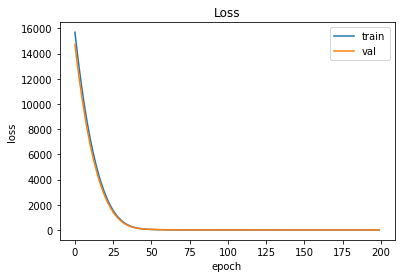

In [8]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [9]:
y_weights = model.get_layer('y').get_weights()

print('y_weights'); print(y_weights)

y_weights
[array([[0.9999995],
       [2.       ],
       [3.       ]], dtype=float32), array([0.99999946], dtype=float32)]
